In [1]:
import pandas as pd
import seaborn as sns

In [2]:
## Section 1
### Get data and examine it

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

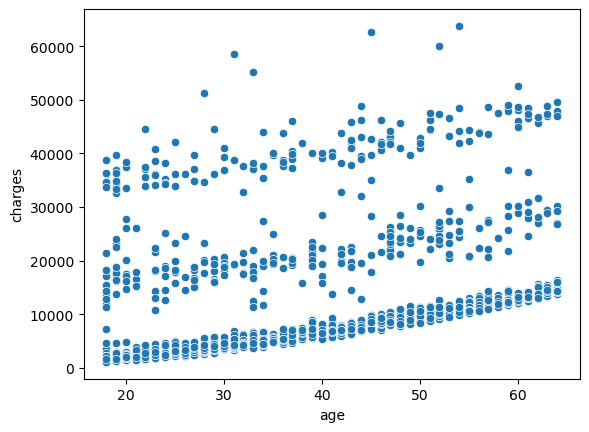

In [6]:
# 1.How is age related to medical costs?
sns.scatterplot(data=df, x='age',y='charges')

In [7]:
### Hospital costs increase on age


In [8]:
# 2.How is number of children related to medical costs?
children = df.groupby('children').mean()[['charges']].reset_index()
children

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


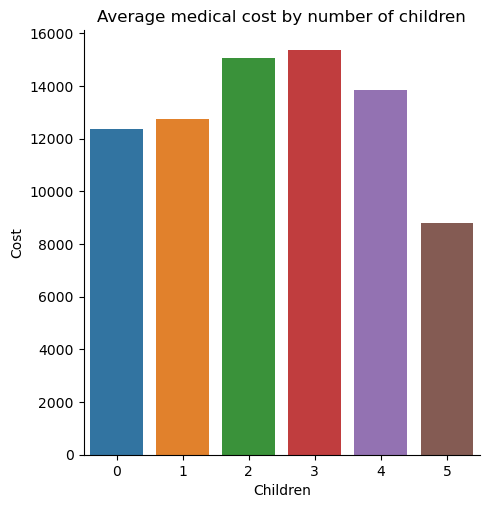

In [9]:
g= sns.catplot(data=children, x='children',y='charges',kind='bar')
for ax in g.axes.flat:
    ax.set( title = 'Average medical cost by number of children',
              xlabel= 'Children', ylabel = 'Cost')

In [10]:
# Plot above show how relative about number of children and medical cost

In [11]:
df.groupby('children').count()[['age']].rename(columns={'age': 'number'}).reset_index()


,children,number
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


In [12]:
# 3.How is the number of people distributed by region?
df.groupby('region').count()[['charges']].rename(columns={'charges': 'numbers_people_charges'}).reset_index()

,region,numbers_people_charges
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


<AxesSubplot:ylabel='region'>

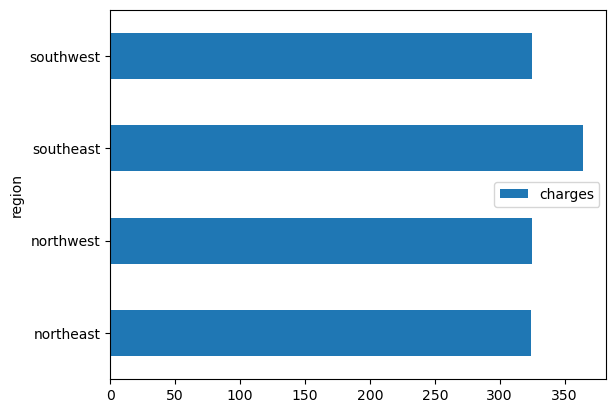

In [13]:
df.groupby('region').count()[['charges']].plot(kind='barh')

### The number of people sampled from each region is roughly equal, but slightly higher in the South East

<AxesSubplot:ylabel='Density'>

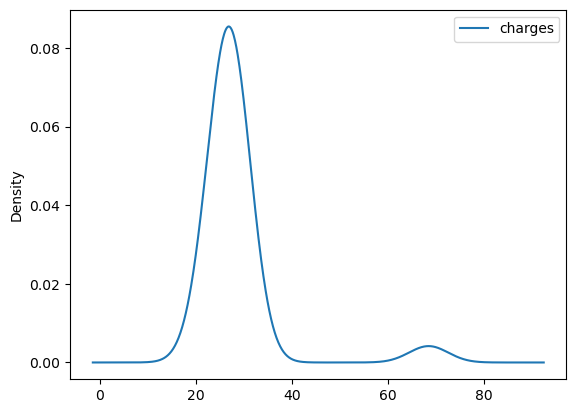

In [14]:
# 4.How is the number of people distributed by age?
df.groupby('age').count()[['charges']].plot(kind='kde')

In [15]:
### Most people are between 20 and 40 with another cluster between 60 and 80

In [16]:
# 5.How are the charges distributed?
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:ylabel='Density'>

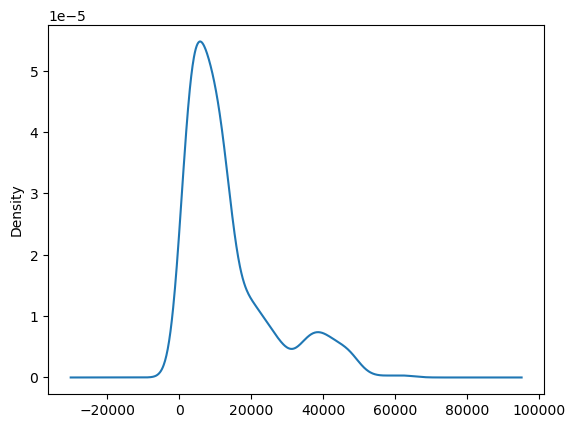

In [17]:
df.charges.plot(kind='kde')

### Most charges are less than 20,000 but the charges range up to 64,000

## Section 2

### Bin the BMI data

### 6.Bin the bmi column.
### Classfication for BMI:
    < 18.5      :underweight
    18.5 - 24.9 :healthy
    25 - 29.9   :overweight
    30 <        :obese

In [18]:
# Bins based on ranges and labels
df['binBMI'] = pd.cut(df.bmi, bins=[0,18.5,25.0,30.0,100.],
                     labels=['Underweight','Healthy','Overweight','Obese'],
                      right=True)
df

,age,sex,bmi,children,smoker,region,charges,binBMI
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


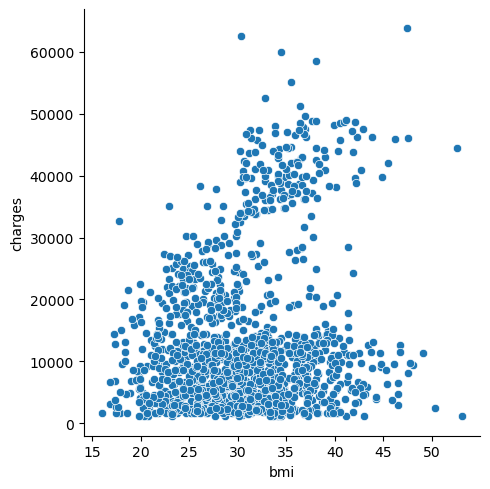

In [19]:
# 7.How are the charges related to the bmi?
sns.relplot(data=df,x='bmi',y='charges',kind='scatter')

In [20]:
### At the low end of the plot, most of charges are under 20k but it gets more and more when BMI increase

In [21]:
# 8.How is the smoker status related to the charges?
df.groupby('smoker').describe()[['charges']].T

smoker                   no           yes
charges count   1064.000000    274.000000
        mean    8434.268298  32050.231832
        std     5993.781819  11541.547176
        min     1121.873900  12829.455100
        25%     3986.438700  20826.244213
        50%     7345.405300  34456.348450
        75%    11362.887050  41019.207275
        max    36910.608030  63770.428010

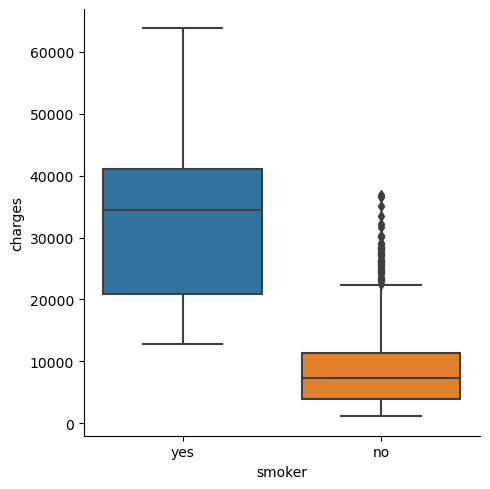

In [22]:
# More infos about describe() method
sns.catplot(data=df, x='smoker', y='charges', kind= 'box')

### Smoker's medical bills are much higher than non smokers

In [23]:
# 9.How are the charges related to the region?
df.groupby('region').describe()[['charges']].T

region            northeast     northwest     southeast     southwest
charges count    324.000000    325.000000    364.000000    325.000000
        mean   13406.384516  12417.575374  14735.411438  12346.937377
        std    11255.803066  11072.276928  13971.098589  11557.179101
        min     1694.796400   1621.340200   1121.873900   1241.565000
        25%     5194.322288   4719.736550   4440.886200   4751.070000
        50%    10057.652025   8965.795750   9294.131950   8798.593000
        75%    16687.364100  14711.743800  19526.286900  13462.520000
        max    58571.074480  60021.398970  63770.428010  52590.829390

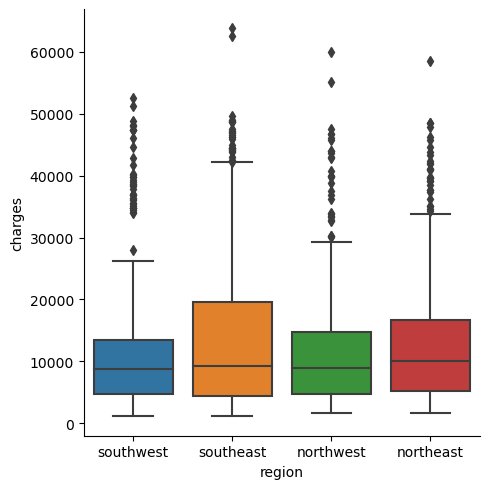

In [24]:
sns.catplot(data=df, x='region', y='charges', kind= 'box')

### Each region is petty close, but southeast and northeast looks like higher than other regions

In [25]:
# 10.Which region has the highest obesity percentage?
pcByRegion = df.groupby('region')['binBMI'].value_counts(normalize=True).to_frame()
pcByRegion.columns = ['percent']
pcByRegion.reset_index(inplace=True)
pcByRegion

,region,level_1,percent
0,northeast,Obese,0.441358
1,northeast,Overweight,0.302469
2,northeast,Healthy,0.225309
3,northeast,Underweight,0.030864
4,northwest,Obese,0.455385
5,northwest,Overweight,0.329231
6,northwest,Healthy,0.193846
7,northwest,Underweight,0.021538
8,southeast,Obese,0.667582
9,southeast,Overweight,0.219780


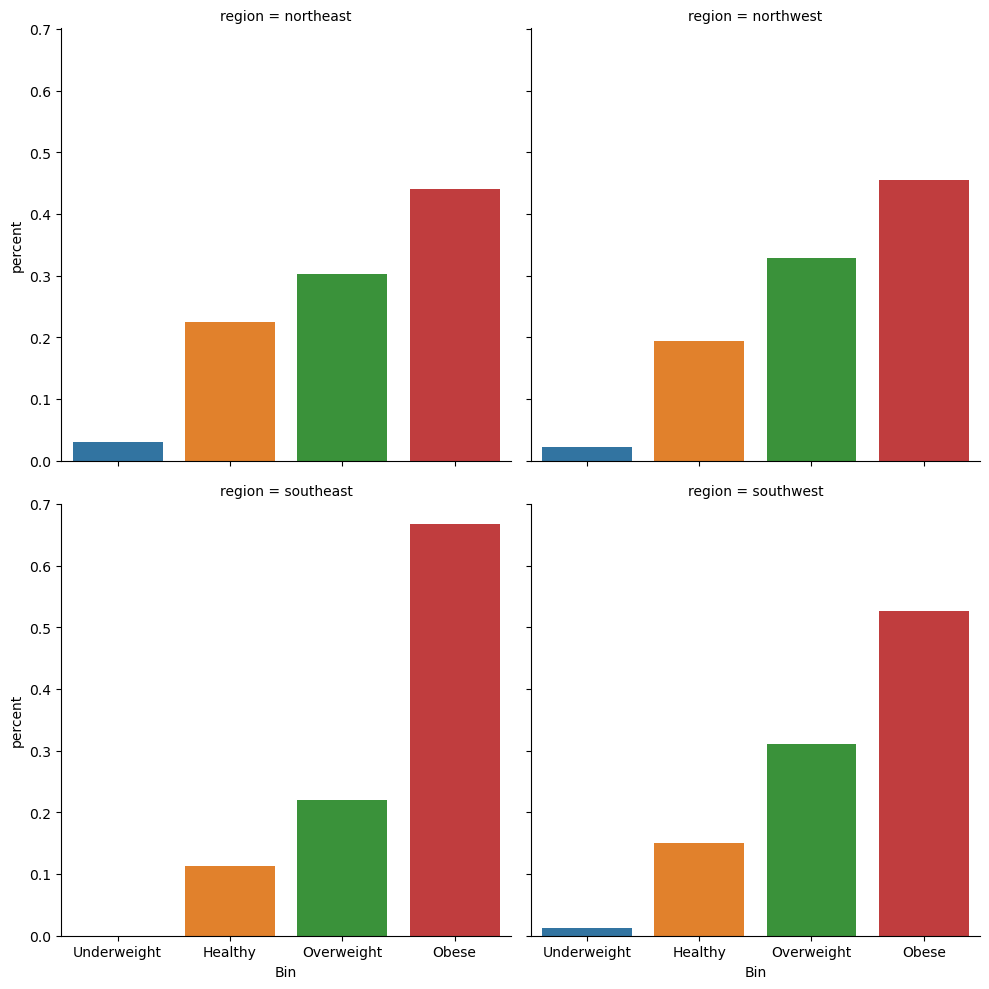

In [26]:
g=sns.catplot(data=pcByRegion,x='level_1',y='percent',col='region',col_wrap=2,kind='bar')
for ax in g.axes.flat:
    ax.set(xlabel='Bin')

### Base on the chart, South East region has highest percent Obese

## Section 3

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

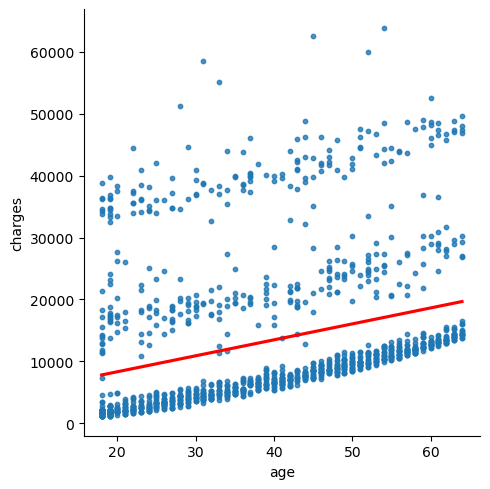

In [28]:
# 11.•Create a simple regression to show the relationship between charges and age.
sns.lmplot(data=df, x='age',y='charges',ci=None,
          line_kws={'color':'red'},scatter_kws={'s':10})

### The positive slope indicaties an upward trend in the data

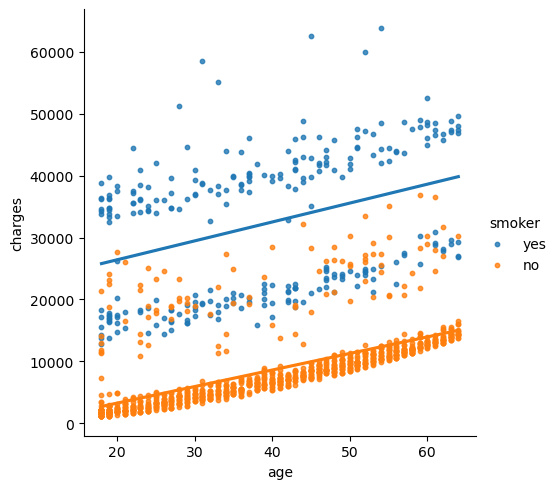

In [29]:
# 12.How does this relationship change with smoking status?
sns.lmplot(data=df, x='age',y='charges', hue= 'smoker',
          ci=None,scatter_kws={'s':10})

### Trend upward over the age is the same, but smoker bills with much higher (4-5 times non-smokers).
### The orange line is difficult to see, but it is if we look closely

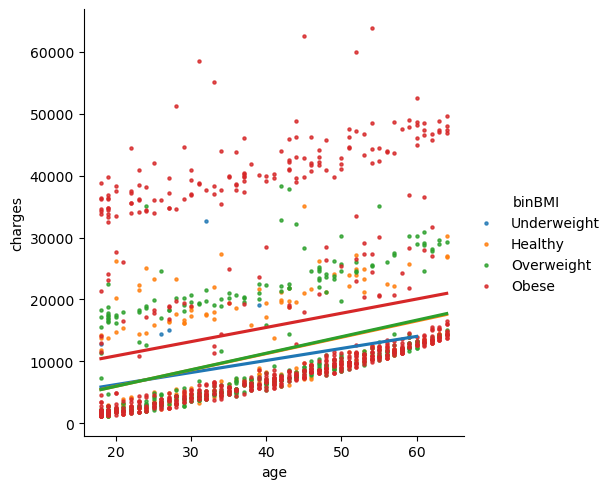

In [30]:
# 13.How does this relationship change with BMI?
sns.lmplot(data=df, x='age',y='charges', hue= 'binBMI',
          ci=None,scatter_kws={'s':5})

 ### Most the highest charges are for people that are overweight or obese

In [31]:
# 14.Create a multiple regression model to predict charges.
# We need dummy to encode and rescale data
# convert numberic to strings to make dummy work

df.children=df.children.astype(str)

In [32]:
# Create dummy
catCols = ['sex','children','smoker','region','binBMI']
dummies = pd.get_dummies(df[catCols])
dfDummies = df.drop(columns=catCols)
dfDummies = dfDummies.join(dummies)
dfDummies

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,...,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,binBMI_Underweight,binBMI_Healthy,binBMI_Overweight,binBMI_Obese
0,19,27.900,16884.92400,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,18,33.770,1725.55230,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,28,33.000,4449.46200,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,33,22.705,21984.47061,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1334,18,31.920,2205.98080,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1335,18,36.850,1629.83350,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1336,21,25.800,2007.94500,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [33]:
# rescale bmi and age columns
scaler = StandardScaler()
numCols = ['bmi','age']
dfDummies[numCols] = scaler.fit_transform(dfDummies[numCols])
dfDummies

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,...,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,binBMI_Underweight,binBMI_Healthy,binBMI_Overweight,binBMI_Obese
0,-1.438764,-0.453320,16884.92400,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,-1.509965,0.509621,1725.55230,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.797954,0.383307,4449.46200,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,-0.441948,-1.305531,21984.47061,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,-0.513149,-0.292556,3866.85520,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,10600.54830,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1334,-1.509965,0.206139,2205.98080,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1335,-1.509965,1.014878,1629.83350,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1336,-1.296362,-0.797813,2007.94500,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [34]:
# correlation data
dfDummies.corr()[['charges']].sort_values('charges', ascending= False)

,charges
charges,1.000000
smoker_yes,0.787251
age,0.299008
binBMI_Obese,0.199683
bmi,0.198341
region_southeast,0.073982
children_2,0.069639
children_3,0.062795
sex_male,0.057292
children_4,0.006614


In [35]:
# test and train data set
dfTrain,dfTest = train_test_split(dfDummies,test_size=0.2, random_state=20)

In [36]:
# create Model and select predictors
model = LinearRegression()
xCols=['smoker_yes','age','bmi']

In [37]:
# fit and score model
model.fit(dfTrain[xCols],dfTrain['charges'])
model.score(dfTest[xCols],dfTest['charges'])

0.7963444799919928

In [38]:
# 15.Make predictions with your multiple regression model and evaluate how well your model is working.
y_pred = model.predict(dfTest[xCols])

In [39]:
predictions=dfTest[['charges']].reset_index(drop=True).join(pd.Series(y_pred,name='predicted'))

In [40]:
predictions['residuals'] = predictions.charges - predictions.predicted

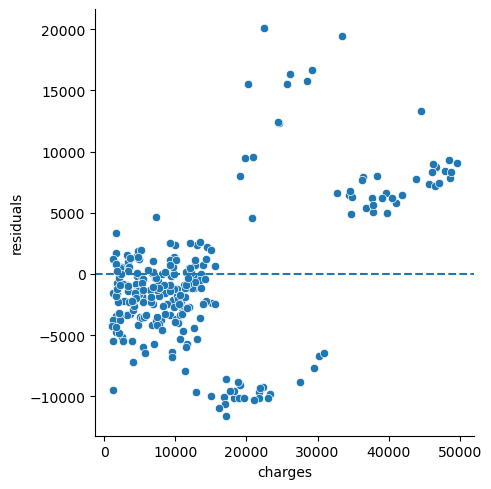

In [41]:
g = sns.relplot(data=predictions, x='charges', y='residuals', kind='scatter')

for ax in g.axes.flat:
    ax.axhline(0, ls='--')

### THe model is more accurate for the lower charges, but its performance get worse at the higher charges.

In [42]:
# 16.What is the optimal number of parameters for the multiple regression?
# Create fit and feature selector
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(dfTrain.drop(columns=['charges']),dfTrain['charges'])

x_train_fs = fs.transform(dfTrain.drop(columns=['charges']))
x_test_fs = fs.transform(dfTest.drop(columns=['charges']))

In [43]:
# create the model testing loop
model = LinearRegression()
testScores=[]
trainScores=[]

for i in range (1, len(dfTrain.columns)):
    fs = SelectKBest( score_func=mutual_info_regression,k=i)
    fs.fit(dfTrain.drop(columns=['charges']),dfTrain['charges'])
    x_test_fs = fs.transform(dfTest.drop(columns=['charges']))
    x_train_fs = fs.transform(dfTrain.drop(columns=['charges']))
    
    model.fit(x_train_fs, dfTrain['charges'])
    
    testScore = model.score(x_test_fs,dfTest['charges'])
    trainScore = model.score(x_train_fs,dfTrain['charges'])
    testScores.append(testScore)
    trainScores.append(trainScore)

<AxesSubplot:xlabel='numFeatures'>

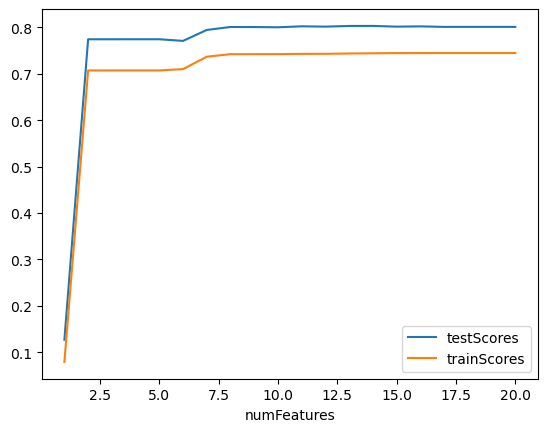

In [44]:
# prepare and plot the scores
features = pd.DataFrame(data={'testScores':testScores, 'trainScores': trainScores})
features.reset_index(inplace=True)
features.rename(columns={'index':'numFeatures'},inplace=True)
features.numFeatures = features.numFeatures + 1
features.plot(x='numFeatures', y=['testScores','trainScores'])

### The optimal number of parameter is 2
### That because after 2, there are only small increase in the scores.